# Rough Heston smiles using the Padé approximations

$$
\newcommand{\bea}{\begin{eqnarray}}
\newcommand{\eea}{\end{eqnarray}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\F}{\mathcal{F} }
\newcommand{\cF}{\mathcal{F} }
\newcommand{\E}{\mathbb{E} }
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\p}{\partial}
\newcommand{\PP}{\mathbb{P} }
\newcommand{\Pof}[1]{\mathbb{P}\left[ #1 \right]}
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\R}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
\newcommand{\Hess}{\mathrm{Hess} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bit}{\begin{itemize}}
\newcommand{\eit}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\tr}{\mbox{tr}}
$$

In [1]:
source("BlackFormula.R")
source("roughHestonAdamsLambda.R")
source("roughHestonPadeLambda.R")
source("Lewis.R")
source("plotIvols.R")

In [2]:
library(repr)
library(colorspace)
options(repr.plot.width=10,repr.plot.height=7,repr.plot.res=100)

In [3]:
my.col <- sequential_hcl(5, palette="Batlow")
bl <- "royalblue"
rd <- "red2"
pk <- "hotpink1"
gr <- "green4"
br <-"brown"
pu <- "purple"

### Parameters

We choose parameters similar to those in Roughening Heston.

In [4]:
params.rHeston <- list(al=.55,H=0.05,nu=0.4,rho=-.65,lam=1)

### The forward variance curve

In [5]:
xiCurve <- function(t){(0.0064-.04)*exp(- 3*t)+.04}

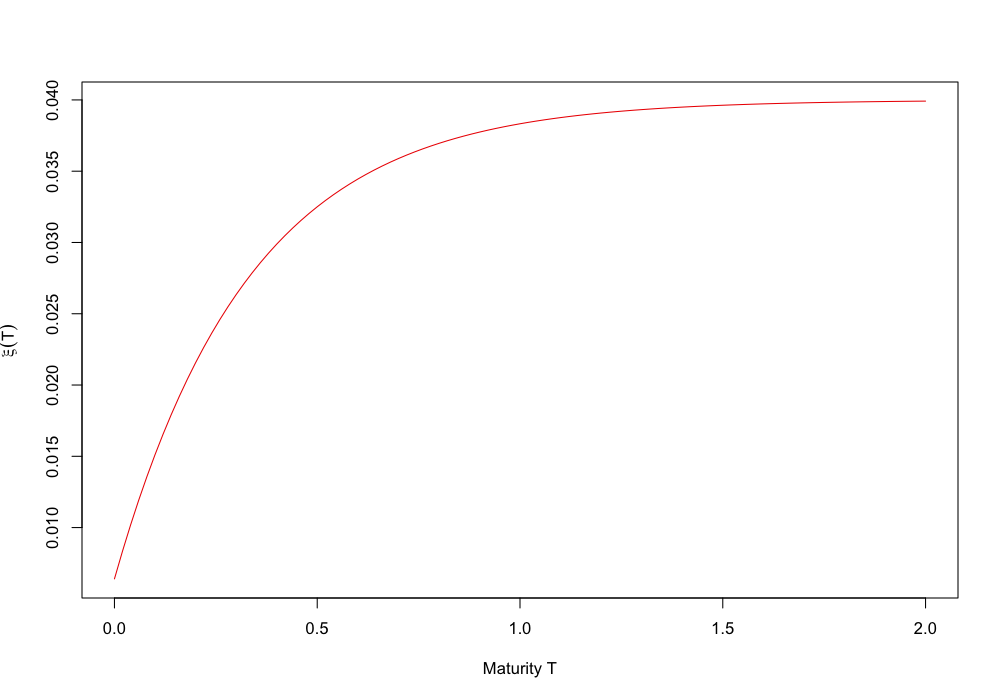

In [6]:
curve(xiCurve,from=0,to=2,col=rd,xlab="Maturity T",ylab = expression(xi(T)))

### Padé characteristic functions

`phiRoughHestonDhApprox` from `roughHestonPade.R` takes any choice of approximation of $D^\alpha h$ as input.

In [7]:
phi.33 <- phiRoughHestonRational(params.rHeston, xiCurve, h.approx= h.Pade33, n=200)
phi.44 <- phiRoughHestonRational(params.rHeston, xiCurve, h.approx= h.Pade44, n=200)
phi.55 <- phiRoughHestonRational(params.rHeston, xiCurve, h.approx= h.Pade55, n=200)

In [8]:
c(impvol.phi(phi.33)(k=-.1,t=0.019),impvol.phi(phi.44)(k=-.1,t=0.019),impvol.phi(phi.55)(k=-.1,t=0.019))

[1] 0.2788797 0.2795670 0.2795853

### Draw a 1-year smile

In [9]:
kk <- seq(-.8,.4,.05)

In [10]:
system.time(volPade33.kk <- impvol.phi(phi.33)(kk,t=1))

   user  system elapsed 
  0.329   0.024   0.355 

In [11]:
system.time(volPade44.kk <- impvol.phi(phi.44)(kk,t=1))

   user  system elapsed 
  0.505   0.018   0.524 

In [12]:
system.time(volPade55.kk <- impvol.phi(phi.55)(kk,t=1))

   user  system elapsed 
  3.243   0.017   3.266 

Padé (4,4) seems to offer the best balance between accuracy and computation time.

In [13]:
leg.txt <- c("Pade (3,3)","Pade (4,4)","Pade (5,5)")
leg.posn <- "topright"
leg.inset <- .05

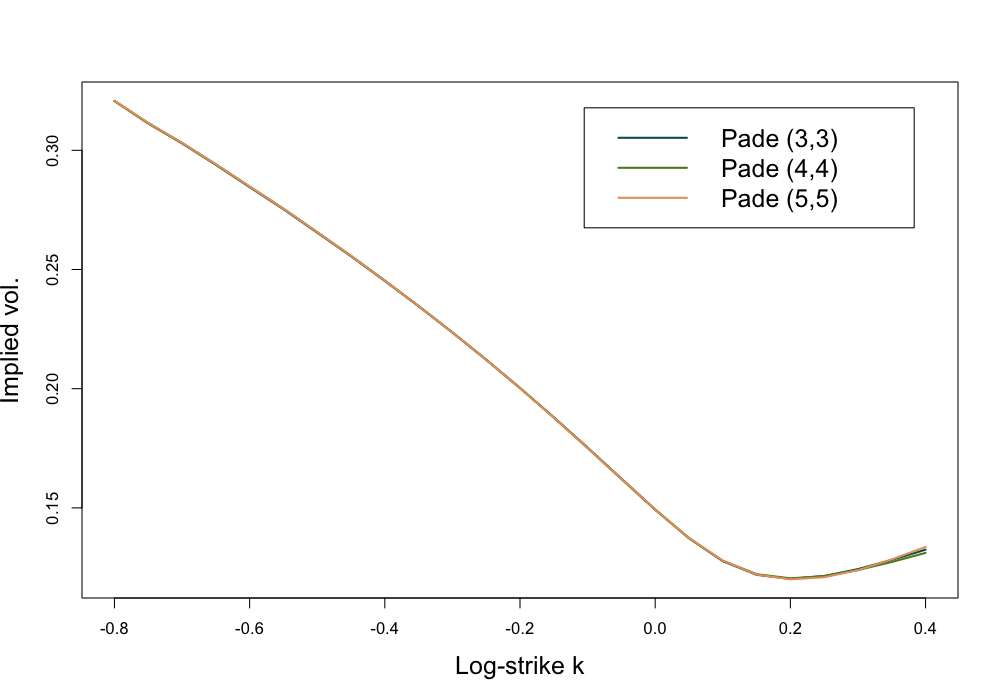

In [14]:
plot(kk,volPade33.kk,col=my.col[2],lwd=2, type="l",
     xlab="Log-strike k", ylab = "Implied vol.",cex.lab=1.5)
lines(kk,volPade44.kk,col=my.col[3],lwd=2)
lines(kk,volPade55.kk,col=my.col[4],lwd=2)
legend(leg.posn,leg.txt, cex=1.5, inset=.05, col=my.col[2:4], lwd=2)

Smiles are almost identical except in the extreme right tail.

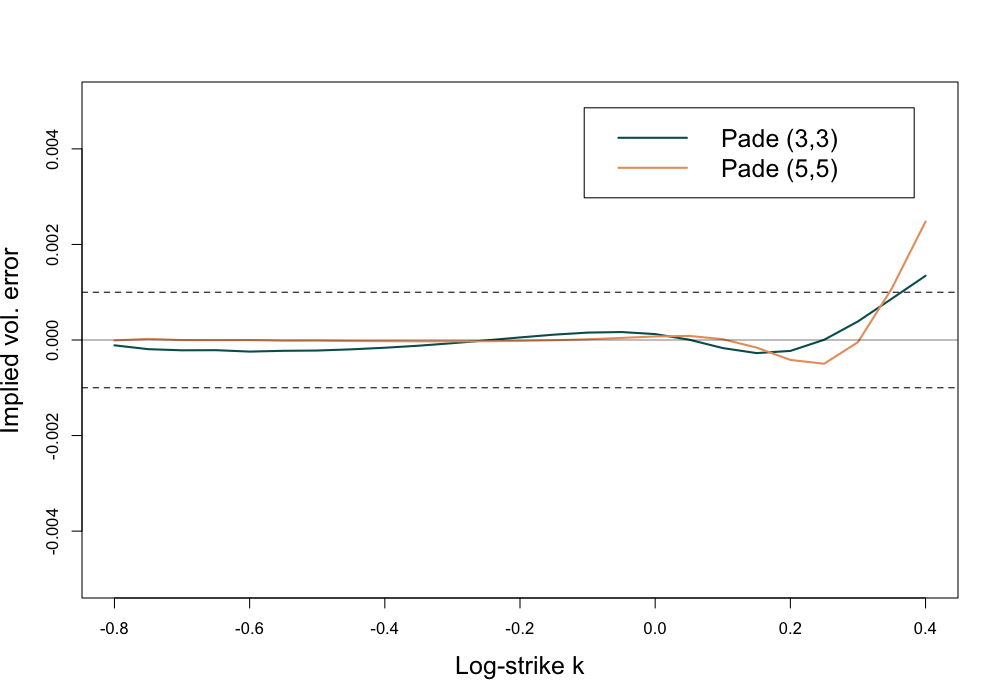

In [15]:
plot(kk,volPade33.kk-volPade44.kk,col=my.col[2],lwd=2,type="l",
     xlab="Log-strike k", ylab = "Implied vol. error",cex.lab=1.5,ylim=c(-.005,.005))
lines(kk,volPade55.kk-volPade44.kk,col=my.col[4],lwd=2)
abline(h=.001,lty=2)
abline(h=-.001,lty=2)
abline(h=0,lwd=.5)
legend(leg.posn,leg.txt[c(1,3)], cex=1.5, inset=.05, col=c(my.col[c(2,4)]), lwd=2)